<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Setembro_Lista_de_Exercicios_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios Data Science - Setembro 2022

Autor: Jorge Chamby Diaz
_________

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (accuracy_score, plot_confusion_matrix,
                             classification_report, roc_curve, roc_auc_score)

# abaixo estou importando 'warnings' para evitar avisos duarnte
# a rodagem de nosso código e assim deixar a visualização mais limpa
import warnings
warnings.filterwarnings('ignore')

_______

# Questões DS

## O Problema

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro de cada 5 mortes por CVDs são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. 

Pessoas com doença cardiovascular ou com alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, onde um modelo de aprendizado de máquina pode ser de grande ajuda.

## Os dados

A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca:

- Medidas de 11 variáveis que caracterizam cada amostra (as features do problema):
<br><br>
    - 1 - Age: idade do paciente (anos)
    - 2 - Sex: sexo do paciente (M: Masculino, F: Feminino)
    - 3 - ChestPainType: tipo de dor no peito (TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática)
    - 4 - RestingBP: pressão arterial de repouso (mm Hg)
    - 5 - Cholesterol: colesterol sérico (mm/dl)
    - 6 - FastingBS: glicemia em jejum (1: se FastingBS > 120 mg/dl, 0: caso contrário)
    - 7 - RestingECG: resultados do eletrocardiograma de repouso (Normal: normal, ST: com anormalidade da onda ST-T, LVH: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes)
    - 8 - MaxHR: frequência cardíaca máxima alcançada (Valor numérico entre 60 e 202)
    - 9 - ExerciseAngina: angina induzida por exercício (Y: Sim, N: Não)
    - 10 - Oldpeak: pico antigo = ST (Valor numérico medido em depressão)
    - 11 - ST_Slope: a inclinação do segmento ST do exercício de pico (Up: upsloping, Flat: flat, Down: downsloping)    
<br><br>
- Além disso, há a variável resposta que no caso é uma variável binária:
<br><br>
    - 12 - HeartDisease: classe de saída (1: doença cardíaca, 0: normal)

Para maiores informações sobre a coleta e origem dos dados, veja a página do dataset no repositório UCI machine learning repository, [disponível aqui!](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) 

**Para baixar os conjuntos de dados, podem acessar diretamente a este [link](https://github.com/jchambyd/Datasets/tree/main/Heart-disease)**


_______

1) Cientistas de dados com frequência precisam de ler dados de várias fontes diferentes e juntar em um único conjunto de dados. **Sejam dois datasets com a mesma estrutura de colunas, junte eles em um único dataframe. Leia os arquivos csv `heart_part1.csv` e `heart_part2.csv`.**

In [211]:
# por facilidade de leitura, estamos buscando o dataset diretamente do repositorio
# GiitHub disponível
data_1 = pd.read_csv('https://github.com/jchambyd/Datasets/raw/main/Heart-disease/heart_part1.csv', index_col=0)
data_2 = pd.read_csv('https://github.com/jchambyd/Datasets/raw/main/Heart-disease/heart_part2.csv', index_col=0)

In [212]:
print('Tamanho do dataframe 1:', data_1.shape )
print('Tamanho do dataframe 2:', data_2.shape )

Tamanho do dataframe 1: (500, 12)
Tamanho do dataframe 2: (418, 12)


In [213]:
# Usamos el metodo 'concat' para juntar o datasets
dataset = pd.concat((data_1, data_2), axis = 0)

# - axis = 1 empilha colunas juntas.
# - axis = 0 empilha linhas juntas, desde que corresponda ao cabeçalho da coluna.

print('Tamanho do novo dataframe:', dataset.shape)

Tamanho do novo dataframe: (918, 12)


_______

2) Utilizando o conjunto de dados, estude a distribuição das variáveis numéricas, calculando, para cada coluna, as principais estatísticas descritivas de posição (média, mediana, quartis, etc.) e de dispersão (std, IQR, etc.). Se desejar, visualize as distribuições de cada variável na amostra.

In [214]:
# Usamos o metodo describe() para visualizar as  estatisticas descritivas das variaveis numericas
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [215]:
# verificando se há algum dado nulo em nosso dataset
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [216]:
# verificando se há dados duplicados
dataset.duplicated().sum()

0

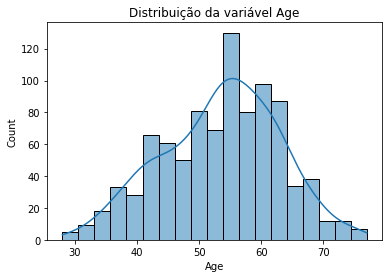

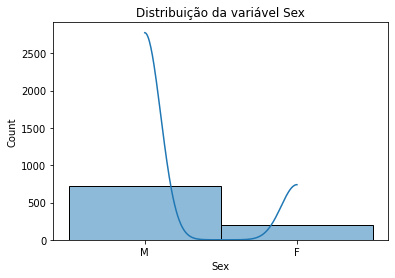

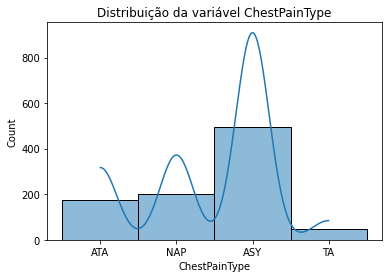

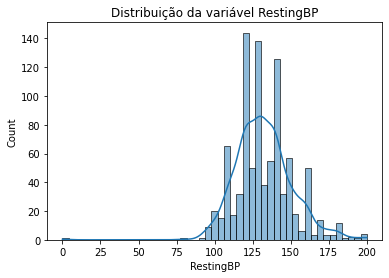

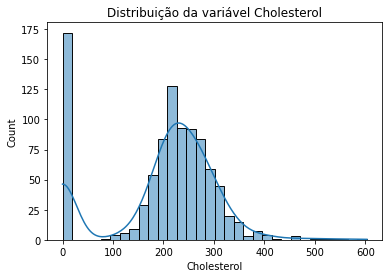

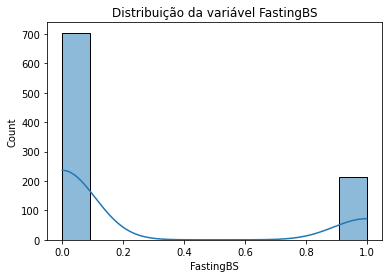

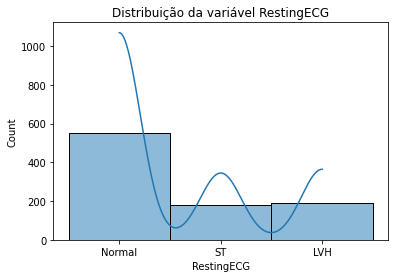

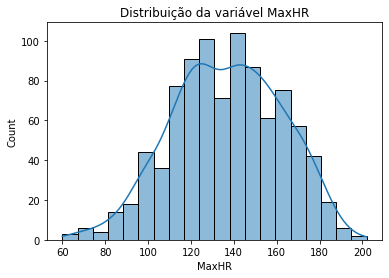

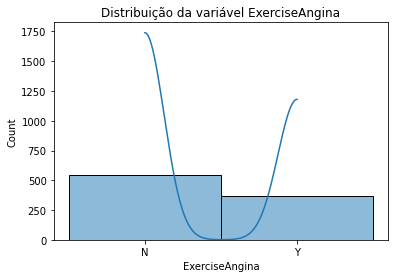

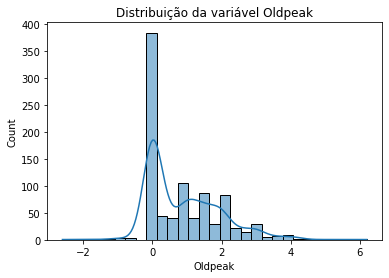

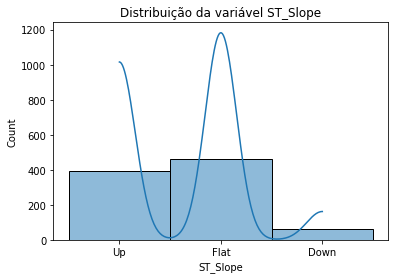

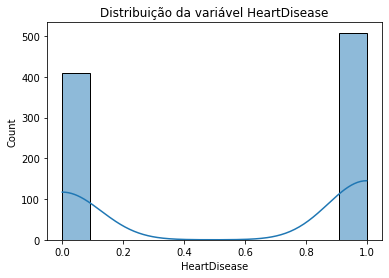

In [217]:
for col in dataset:
    sns.histplot(data=dataset, x=col, kde=True).set_title(f"Distribuição da variável {col}")
    plt.show()

_______

3) Muitas vezes no trabalho de um cientista de dos se tem que lidar com grandes quantidades de dados (Big data!) e é importante usar o espaço corretamente. **Visualize os diferentes tipos de dados das colunas do dataframe, e veja a quantidade de memória que o dataframe está usando atualmente.**


In [218]:
# Visualizamos a informacao do dataframe
# - memory_usage="deep" Para obter o uso total da memória

dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 398.2 KB


_______

Por padrão, o Pandas sempre atribui o tipo de dados de memória mais alto às colunas, muitas vezes sem ser necessário. Por exemplo, se o Pandas interpretou uma coluna como valor inteiro, há possivelmente quatro subcategorias (assinadas) para escolher:

- int8: inteiro de 8 bits que cobre inteiros de $[-2^7, 2^7]$.
- int16: inteiro de 16 bits que cobre inteiros de $[-2^{15}, 2^{15}]$.
- int32: inteiro de 32 bits que cobre inteiros de $[-2^{31}, 2^{31}]$.
- int64: inteiro de 64 bits que cobre inteiros de $[-2^{63}, 2^{63}]$.

4) Para cada coluna inteira, **verifique os valores máximos e mínimos que atualmente estão armazenando.**

In [219]:
for col in dataset: 
    if dataset[col].dtype == np.int64:
        print("Coluna: ", col)
        print("- Maximo valor: ", dataset[col].max())
        print("- Minimo valor: ", dataset[col].min())

Coluna:  Age
- Maximo valor:  77
- Minimo valor:  28
Coluna:  RestingBP
- Maximo valor:  200
- Minimo valor:  0
Coluna:  Cholesterol
- Maximo valor:  603
- Minimo valor:  0
Coluna:  FastingBS
- Maximo valor:  1
- Minimo valor:  0
Coluna:  MaxHR
- Maximo valor:  202
- Minimo valor:  60
Coluna:  HeartDisease
- Maximo valor:  1
- Minimo valor:  0


_______

**Alterando o tipo de dados de colunas inteiras**

Pela análise do exercício 4, deu para ver que algumas dessas colunas poderiam ter um tipo de dado diferente (por causa dos valores máximos e mínimos). Por exemplo, o valor máximo da coluna 'Cholesterol' é 600, então facilmente os diferentes valores encaixam no tipo 'int16' ($[-2^{15} < 600 < 2^{15}]$). 

5) Para otimizar nosso uso de memória, **atualize os tipos de dados das colunas numéricas, e depois verifique a quantidade de memoria que o dataset agora usando.**

In [220]:
print('Uso de memória antes de alterar o tipo de dados:', dataset.memory_usage(deep=True).sum() / 1024, 'KB')

# Pandas fornece a flexibilidade de alterar o tipo de dados de uma coluna usando o metodo 'astype()'

dataset["Age"] = dataset.Age.astype(np.int16)
dataset["RestingBP"] = dataset.RestingBP.astype(np.int16)
dataset["Cholesterol"] = dataset.Cholesterol.astype(np.int16)
dataset["FastingBS"] = dataset.FastingBS.astype(np.int16)
dataset["MaxHR"] = dataset.MaxHR.astype(np.int16)
dataset["HeartDisease"] = dataset.HeartDisease.astype(np.int16)

print('Uso de memória depois de alterar o tipo de dados:', dataset.memory_usage(deep=True).sum() / 1024, 'KB')

Uso de memória antes de alterar o tipo de dados: 398.17578125 KB
Uso de memória depois de alterar o tipo de dados: 365.90234375 KB


_______

**Alterando o tipo de dados de colunas que representam dados categóricos.**

Como o nome sugere, uma coluna categórica é uma coluna que consiste em apenas alguns valores exclusivos que são repetidos várias vezes em toda a coluna. Por exemplo, vamos encontrar o número de valores exclusivos em algumas colunas usando o método `nunique()` conforme mostrado abaixo:

In [221]:
dataset.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [222]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

<font color='SeaGreen'> Abaixo iremos verificar com o método value_counts() o a quantidade de dados diferentes para cada coluna selecionada, por exemplo, veremos a quantidade para a coluna Sex (M -> masculino | F -> feminino) e assim por diante com as outras colunas.

In [223]:
list_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG',
                'ExerciseAngina', 'ST_Slope', 'HeartDisease']

def value_counts(x) -> str:
    print(f'Coluna: {x}')
    vlc = dataset[x].value_counts()
    print(f"{vlc} \n{'-'*50}")

for i in list_columns:
    value_counts(i)

Coluna: Sex
M    725
F    193
Name: Sex, dtype: int64 
--------------------------------------------------
Coluna: ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 
--------------------------------------------------
Coluna: FastingBS
0    704
1    214
Name: FastingBS, dtype: int64 
--------------------------------------------------
Coluna: RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 
--------------------------------------------------
Coluna: ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64 
--------------------------------------------------
Coluna: ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 
--------------------------------------------------
Coluna: HeartDisease
1    508
0    410
Name: HeartDisease, dtype: int64 
--------------------------------------------------


<font color='SeaGreen'> Podemos ver que na listagem acima temos alguns valores bem desbalanceados, vemos isso principalmente na coluna 'Sex' onde temos 725 pessoas do sexo masculino e somente 193 do sexo feminino, se em nosso modelo tivermos algum problema na fase de validação de nosso modelo, podemos realizar um oversample com nossos dados para que possamos ter mais confiança nos resultados, em nossa variável target temos um pequeno desbalanceamento, caso seja necessário realizaremos o oversample nela também.

O número de valores exclusivos nessas colunas em relação ao tamanho do DataFrame mostra que são colunas categóricas. No entanto, por padrão, o Pandas inferiu o tipo de dados de todas essas colunas como 'object' (como visto no Exercício 3).

6) Usando o método `astype()`, **altere o tipo de dados de uma coluna categórica para 'category'. Analise a redução na utilização de memória.**

In [224]:
print('Uso de memória incial:', dataset.memory_usage(deep=True).sum() / 1024, 'KB')

# Para cada coluna com tipo de dado 'object', atualizamos para 'category'
for col in dataset: 
    if dataset[col].dtype == 'object':
        dataset[col] = dataset[col].astype("category")
        
print('Uso de memória depois de alterar o tipo de dados \'object\':', dataset.memory_usage(deep=True).sum() / 1024, 'KB')

Uso de memória incial: 365.90234375 KB
Uso de memória depois de alterar o tipo de dados 'object': 63.47265625 KB


_______

Os Exercicios #5 e #6 acima pressupõem que você já tenha um Pandas DataFrame carregado no ambiente python. Em outras palavras, essas eram técnicas de pós-entrada para otimizar a utilização da memória.

No entanto, em situações em que o carregamento do conjunto de dados é o principal desafio, você pode assumir o controle da tarefa de interpretação de tipo de dados realizada pelo Pandas durante a entrada e especificar o tipo de dados específico para o qual deseja que suas colunas sejam inferidas.

**7) Passe os tipos dos dados como argumento no metodo `read_csv`, para otimizar memoria desde a leitura (Leia o arquivo csv `heart.csv`).**

In [225]:
dataset = pd.read_csv('https://github.com/jchambyd/Datasets/raw/main/Heart-disease/heart.csv', 
                   dtype = {"Age":np.int16, 
                            "Sex":"category",
                            "ChestPainType":"category", 
                            "RestingBP":np.int16, 
                            "Cholesterol":np.int16, 
                            "FastingBS":np.int16,
                            "RestingECG":"category",
                            "MaxHR":np.int16,
                            "ExerciseAngina":"category",
                            "Oldpeak":np.float64,
                            "ST_Slope":"category",
                            "HeartDisease":np.int16})

print('Uso de memória:', dataset.memory_usage(deep=True).sum() / 1024, 'KB')

Uso de memória: 23.8671875 KB


_______

Suponha que você tenha feito tudo o que podia, mas o CSV ainda é impossível de carregar devido a restrições de memória. Existe uma técnica que nos ajuda a carregar grandes conjuntos de dados, que você pode usar em situações tão extremas.
Os métodos de entrada dos pandas são serializados. Portanto, ele lê apenas uma linha (ou linha) por vez de um arquivo CSV. Se o número de linhas for extremamente grande para carregar na memória de uma só vez, você poderá carregar um segmento (ou bloco) de linhas, processá-lo e ler o próximo segmento do arquivo CSV.

**8) Faça a leitura do arquivo `heart.csv` em blocos de 500 linhas, e depois para cada bloco faça a soma da coluna 'HeartDisease', para saber quantas pessoas do conjunto de dados têm uma doença cardíaca.**

In [226]:
# Lendo o total de pessoas com doenca cardiaca fazendo uma unica leitura
print('Total de pessoas com doenca cardiaca:', dataset['HeartDisease'].sum())

bloco = 1
total = 0
# Passando o argumento 'chunksize' para o método read_csv()
for chunk in pd.read_csv("https://github.com/jchambyd/Datasets/raw/main/Heart-disease/heart.csv", chunksize=500):    
    print('# de pessoas com doenca cardiaca no bloco', bloco, ':' , chunk['HeartDisease'].sum())
    bloco = bloco + 1
    total = total + chunk['HeartDisease'].sum()
    
print('Total de pessoas com doenca cardiaca (contando por blocos):', total)

Total de pessoas com doenca cardiaca: 508
# de pessoas com doenca cardiaca no bloco 1 : 284
# de pessoas com doenca cardiaca no bloco 2 : 224
Total de pessoas com doenca cardiaca (contando por blocos): 508


_______

**Analisando os dados**

9) Utilizando nosso conjunto de dados, responda: existe alguma coluna com outliers? Indique qual método de detecção de outliers você utilizou, justificando seu uso.

In [227]:
for col in dataset:
    if dataset[col].dtype != 'category':
        mu, std = dataset[col].mean(), dataset[col].std() 
        # usando o critério de |z| > 3 (não é dos melhores, mas tá ok kkkkk)
        aux_outlier = dataset[col].apply(lambda x: (x-mu)/std).apply(lambda x: True if abs(x) > 3 else False)
        if aux_outlier.sum() > 0:
            print(f"- Outliers de {col}:\n")
            print(dataset[aux_outlier][col].tolist())
        else:
            print(f"- Não há outliers na coluna {col}!\n")

- Não há outliers na coluna Age!

- Outliers de RestingBP:

[190, 200, 200, 200, 0, 190, 200, 192]
- Outliers de Cholesterol:

[529, 603, 564]
- Não há outliers na coluna FastingBS!

- Outliers de MaxHR:

[60]
- Outliers de Oldpeak:

[5.0, -2.6, 4.2, 5.6, 4.2, 6.2, 4.4]
- Não há outliers na coluna HeartDisease!



<font color='SeaGreen'> Acima vimos as variáveis que contém outliers, na sequência iremos plotar um conjunto de boxplots para que tenhamos uma ideia mais visível dos outliers.

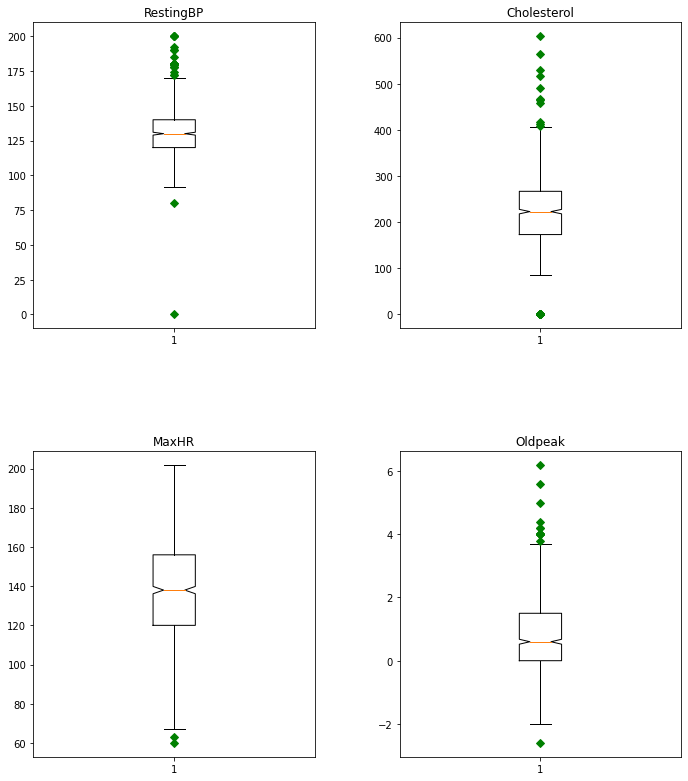

In [228]:
f, ax = plt.subplots(2, 2, figsize=(10,12))
f.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9, hspace=0.4, wspace=0.3)

ax[0, 0].boxplot(dataset.RestingBP, 1, 'gD')
ax[0, 0].set_title('RestingBP')

ax[0, 1].boxplot(dataset.Cholesterol, 1, 'gD')
ax[0, 1].set_title('Cholesterol')

ax[1, 0].boxplot(dataset.MaxHR, 1, 'gD')
ax[1, 0].set_title('MaxHR')

ax[1, 1].boxplot(dataset.Oldpeak, 1, 'gD')
ax[1, 1].set_title('Oldpeak');

_______

**10) Utilizando o conjunto de dados, calcule e/ou visualize a correlação (utilizando a relação que achar mais adequada) entre as variáveis na base.** 

Em particular, estude a correlação entre as features e o target `HeartDisease`, e responda se há correlações fortes.

Plote também a relação entre cada uma das features e o target (na forma de um scatterplot, por exemplo).

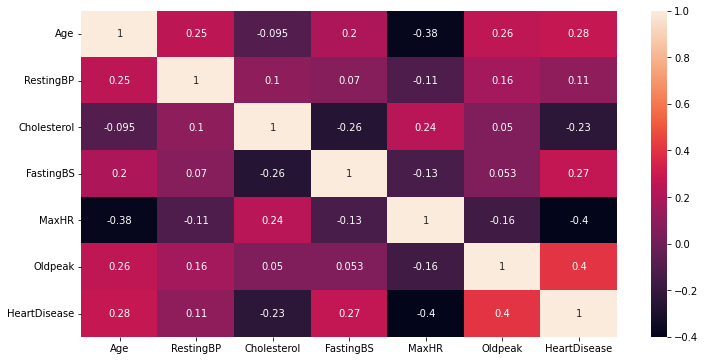

In [229]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(), annot=True);

In [230]:
dataset.corr()["HeartDisease"].sort_values()

MaxHR          -0.400421
Cholesterol    -0.232741
RestingBP       0.107589
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

<font color='SeaGreen'>No código abaixo iremos testar a multicolinearidade das variáveis para com isso ver se temos alta relação(redundância) entre elas.

In [233]:
# separando nossso dataset da variável target
X = dataset.iloc[:, 0:11]
# separando a variável target
y = dataset.iloc[:,11]

In [234]:
data = X[~X.isin([np.nan, np.inf, -np.inf]).any(1)]
# somente variáveis numéricas
X_variables = data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]
X_variables       

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


In [235]:
# criando as colunas
multi_data = pd.DataFrame()
multi_data["feature"] = X_variables.columns
multi_data

,feature
0,Age
1,RestingBP
2,Cholesterol
3,FastingBS
4,MaxHR
5,Oldpeak


In [236]:
# realizando o calculo da multicolinearidade
multi_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
multi_data

,feature,VIF
0,Age,29.254296
1,RestingBP,42.122441
2,Cholesterol,4.980057
3,FastingBS,1.450433
4,MaxHR,19.690697
5,Oldpeak,1.849527


<font color='SeaGreen'> Podemos ver acima que as variáveis 'Age', 'RestingBP' e 'MaxHR' teem alta multicolinearidade, e isso pode influenciar caso usemos modelos de regressão para criar nossos modelos.

<font color='SeaGreen'> Nesta etapa iremos realizar o encoder de nosso dataset, que nada mais é que tranformar nossas variáveis categóricas em numéricas, e em seguida o OneHotEncoder, para que sejam dividas essas varáveis (agora tranformadas) em colunas de 0 e 1.

In [237]:
lb = LabelEncoder()
X.Sex = lb.fit_transform(X.Sex) 
X.ChestPainType = lb.fit_transform(X.ChestPainType)
X.RestingECG = lb.fit_transform(X.RestingECG)
X.ExerciseAngina = lb.fit_transform(X.ExerciseAngina) 
X.ST_Slope = lb.fit_transform(X.ST_Slope)

In [238]:
# podemos verificar agora que nosso dataset tem somente
# variáveis numéricas
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int16  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int16  
 4   Cholesterol     918 non-null    int16  
 5   FastingBS       918 non-null    int16  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int16  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
dtypes: float64(1), int16(5), int64(5)
memory usage: 52.1 KB


In [239]:
# podemos ver na saída abaixo que a variável 'RestingECG' agora
# conta com os valores 0, 1 e 2.
X.RestingECG.value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

In [240]:
oneHoteEncoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),
                                                  [1,2,6,8,10])],
                                                  remainder='passthrough')

In [241]:
X = oneHoteEncoder.fit_transform(X)
X.shape

(918, 20)

<font color='SeaGreen'> Na saída acima podemos ver que nosso dataset agora contém 21 colunas.

<font color='SeaGreen'>Dando senquência neste etapa iremos normalizar nossos dados, já que o modelo de Machine Learning trabalha melhor com dados normalizados, como podemos ver nas variáveis 'Cholesterol' e 'FastingBS' onde o valor máximo da primeira é 603 e da segunda 1, isso poderá influenciar no modelo.

In [242]:
# criando e ajustando o modelo escalonado
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X.shape

(918, 20)

In [245]:
# dados normalizados
X

array([[-0.51595242,  0.51595242, -1.08413811, ..., -0.55134134,
         1.38292822, -0.83243239],
       [ 1.93816322, -1.93816322, -1.08413811, ..., -0.55134134,
         0.75415714,  0.10566353],
       [-0.51595242,  0.51595242, -1.08413811, ..., -0.55134134,
        -1.52513802, -0.83243239],
       ...,
       [-0.51595242,  0.51595242,  0.9223917 , ..., -0.55134134,
        -0.85706875,  0.29328271],
       [ 1.93816322, -1.93816322, -1.08413811, ..., -0.55134134,
         1.4615246 , -0.83243239],
       [-0.51595242,  0.51595242, -1.08413811, ..., -0.55134134,
         1.42222641, -0.83243239]])

<font color='SeaGreen'> No código abaixo iremos dividir nosso dataset em treino e test

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 20), (184, 20), (734,), (184,))

<font color='SeaGreen'><h1><center> Abaixo iremos iniciar nossos treinamentos e testes de Machine Learning

### Regressão Logística (Logistic Regression)

In [260]:
def run_log_reg(X, Y, test_x, test_y):
  """Roda Logistic Regression"""
  
  kVals_log_reg = range(1000, 5500, 500)
  accuracy = []

  # criando o classificador e treinando modelo
  # abaixo nosso código é treinado com várias iterações com as variáveis de treino
  for k in kVals_log_reg:
    lr = LogisticRegression(max_iter=k)
    lr = lr.fit(X, Y)
    
    # realizando a predição do modelo
    y_pred = lr.predict(test_x)

    # verificando acurácia do modelo
    accuracy_lr = accuracy_score(test_y, y_pred)
    print("Com %d iterações, a acurácia do modelo é: %.2f%%" % (k, accuracy_lr * 100))
    accuracy.append(accuracy_lr)

  # utilizando o classification report 
  print(classification_report(y_test, y_pred))
  
  # Obtendo o valor de k que apresentou a maior acurácia
  i = np.argmax(accuracy)
  
  print("\nO valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados!" % (kVals_log_reg[i], accuracy[i] * 100))

  print('\n***********ROC CURVE***********\n')
  prob_lr = lr.predict_proba(X_test)[:,1]
  fpr, tpr, limit = roc_curve(y_test, prob_lr) # define a curva ROC
  roc_lr = roc_auc_score(y_test, prob_lr)
  # calculo da area sobre a curva ROC
  print(f'Curva ROC: {(round(roc_lr, 3)*10)}')

  # plotando a curva ROC

  plt.subplots(1, figsize=(8,8))
  plt.title("Curva ROC Logistic Regression")
  plt.plot(fpr, tpr)
  plt.xlabel('Especificidade')
  plt.ylabel('Sensibilidade')
  plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
  plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
  plt.show()

  print('\n***********CONFUSION MATRIX***********\n')
  conf_matrix = plot_confusion_matrix(lr, X_test, y_test, cmap='Greens')

Com 1000 iterações, a acurácia do modelo é: 85.33%
Com 1500 iterações, a acurácia do modelo é: 85.33%
Com 2000 iterações, a acurácia do modelo é: 85.33%
Com 2500 iterações, a acurácia do modelo é: 85.33%
Com 3000 iterações, a acurácia do modelo é: 85.33%
Com 3500 iterações, a acurácia do modelo é: 85.33%
Com 4000 iterações, a acurácia do modelo é: 85.33%
Com 4500 iterações, a acurácia do modelo é: 85.33%
Com 5000 iterações, a acurácia do modelo é: 85.33%
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184


O valor de k = 1000 alcançou a mais alta acurácia de 85.33% nos dados!

***********ROC CURVE***********

Curva ROC: 9.27


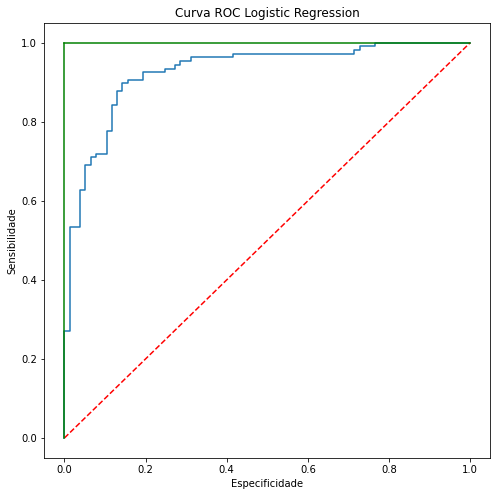


***********CONFUSION MATRIX***********



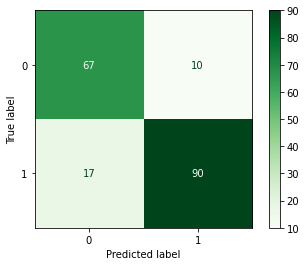

In [261]:
run_log_reg(X_train, y_train, X_test, y_test)

In [266]:
lr = LogisticRegression(max_iter=1000).fit(X, y)
prediction = lr.predict(X_test)
tam_i = []
for i in prediction[1:]:
  if i == 1:
    tam_i.append(i)
error_valid_lr = (len(tam_i))
print(f"No conjunto de treino X com {X_train.shape[0]}, temos {error_valid_lr} dados classificados errados")

No conjunto de treino X com 734, temos 103 dados classificados errados


<font color='SeaGreen'> Acima temos nossa saída para o algoritmo de Regressão Logística, podemos ver uma boa acurácia 85,33%, temos o precision e recall com ótimo índice, na curva ROC obtivemos ótimo valor também, 9.27, siginifica que nosso modelo está com bastante acerto, e por fim temos nossa matriz de confusão,o onde temos poucos falsos negativos e positivos.

### KNN (K-Near Neighbour) - K Vizinhos Próximos

In [254]:
def run_KNN(X, Y, test_x, test_y):
  """Roda a KNN"""
  
  kVals_KNN = range(3, 11)
  accuracy = []

  # criando classificador e treinando o modelo
  for k in kVals_KNN:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X, Y)
    
    # realizando a predição do modelo
    y_pred = knn.predict(test_x)

    # verificando acurácia do modelo
    accuracy_knn = accuracy_score(test_y, y_pred)
    print("Com valor de %d, a acurácia do modelo é: %.2f%%" % (k, accuracy_knn * 100))
    accuracy.append(accuracy_knn)

  # utilizando o classification report 
  print(classification_report(y_test, y_pred))
  
  # Obtendo o valor de k que apresentou a maior acurácia
  i = np.argmax(accuracy)
  
  print("\nO valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados!" % (kVals_KNN[i], accuracy[i] * 100))

  print('\n***********ROC CURVE***********\n')
  prob_knn = knn.predict_proba(X_test)[:,1]
  fpr, tpr, limit = roc_curve(y_test, prob_knn) # define a curva ROC
  roc_knn = roc_auc_score(y_test, prob_knn)
  # calculo da area sobre a curva ROC
  print(f'Curva ROC: {(round(roc_knn, 3)*10)}')

  # plotando a curva ROC

  plt.subplots(1, figsize=(8,8))
  plt.title("Curva ROC KNN")
  plt.plot(fpr, tpr)
  plt.xlabel('Especificidade')
  plt.ylabel('Sensibilidade')
  plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
  plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
  plt.show()

  print('\n***********CONFUSION MATRIX***********\n')
  conf_matrix = plot_confusion_matrix(knn, X_test, y_test, cmap='Greens')

Com valor de 3, a acurácia do modelo é: 82.61%
Com valor de 4, a acurácia do modelo é: 82.07%
Com valor de 5, a acurácia do modelo é: 86.41%
Com valor de 6, a acurácia do modelo é: 84.78%
Com valor de 7, a acurácia do modelo é: 86.41%
Com valor de 8, a acurácia do modelo é: 85.87%
Com valor de 9, a acurácia do modelo é: 86.41%
Com valor de 10, a acurácia do modelo é: 85.33%
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184


O valor de k = 5 alcançou a mais alta acurácia de 86.41% nos dados!

***********ROC CURVE***********

Curva ROC: 9.23


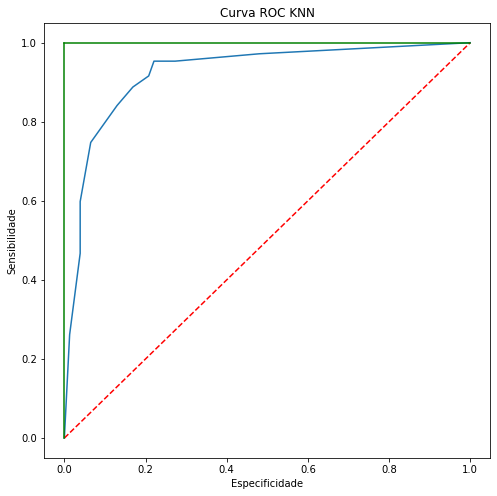


***********CONFUSION MATRIX***********



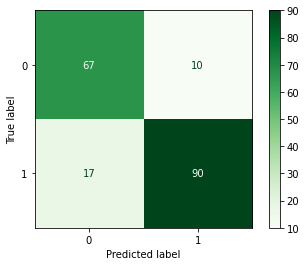

In [262]:
run_KNN(X_train, y_train, X_test, y_test)

In [268]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X, y)
prediction = knn.predict(X_test)
tam_i = []
for i in prediction[1:]:
  if i == 1:
    tam_i.append(i)
error_valid_lr = (len(tam_i))
print(f"No conjunto de treino X com {X_train.shape[0]}, temos {error_valid_lr} dados classificados errados")

No conjunto de treino X com 734, temos 101 dados classificados errados


<font color='SeaGreen'> Neste temos nossa saída para o algoritmo KNN, podemos ver uma boa acurácia com k=5 86,41%, temos o precision e recall com ótimo índice, melhores que mais alinhados que o treino e teste anterior, na curva ROC obtivemos ótimo valor também, 9.23, siginifica que nosso modelo está com bastante acerto, e por fim temos nossa matriz de confusão,o onde temos poucos falsos negativos e positivos.

### Floresta Aleatória (Random Forest)

In [264]:
def run_random_forest(X, Y, test_x, test_y):
  """Roda a Random Forest"""
  
  kVals_random = range(100, 501, 100)
  accuracy = []

  # criando classificador e treinando o modelo
  for k in kVals_random:
    clf = RandomForestClassifier(max_depth=k,
                                 max_features=5,
                                 criterion='gini', 
                                 min_samples_leaf=1,
                                 min_samples_split=2)
    clf = clf.fit(X, Y)
    
    # realizando a predição do modelo
    y_pred = clf.predict(test_x)

    # verificando acurácia do modelo
    accuracy_dec_tree = clf.score(test_x, test_y)
    print("Com valor de %d, a acurácia do modelo é: %.2f%%" % (k, accuracy_dec_tree * 100))
    accuracy.append(accuracy_dec_tree)

    # prediction
    y_pred = clf.predict(test_x)
  
  # Obtendo o valor de k que apresentou a maior acurácia
  i = np.argmax(accuracy)
  print("\nO valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados!\n" % (kVals_random[i], accuracy[i] * 100))
  
  # utilizando o classification report 
  print(classification_report(y_test, y_pred))

  print('\n***********ROC CURVE***********\n')
  prob_clf = clf.predict_proba(X_test)[:,1]
  fpr, tpr, limit = roc_curve(y_test, prob_clf) # define a curva ROC
  roc_clf = roc_auc_score(y_test, prob_clf)
  # calculo da area sobre a curva ROC
  print(f'Curva ROC: {(round(roc_clf, 3)*10)}')

  # plotando a curva ROC

  plt.subplots(1, figsize=(8,8))
  plt.title("Curva ROC Random Forest")
  plt.plot(fpr, tpr)
  plt.xlabel('Especificidade')
  plt.ylabel('Sensibilidade')
  plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
  plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
  plt.show()

  print('\n***********CONFUSION MATRIX***********\n')
  conf_matrix = plot_confusion_matrix(clf, X_test, y_test, cmap='Reds')

Com valor de 100, a acurácia do modelo é: 87.50%
Com valor de 200, a acurácia do modelo é: 88.04%
Com valor de 300, a acurácia do modelo é: 86.96%
Com valor de 400, a acurácia do modelo é: 88.04%
Com valor de 500, a acurácia do modelo é: 86.96%

O valor de k = 200 alcançou a mais alta acurácia de 88.04% nos dados!

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184


***********ROC CURVE***********

Curva ROC: 9.41


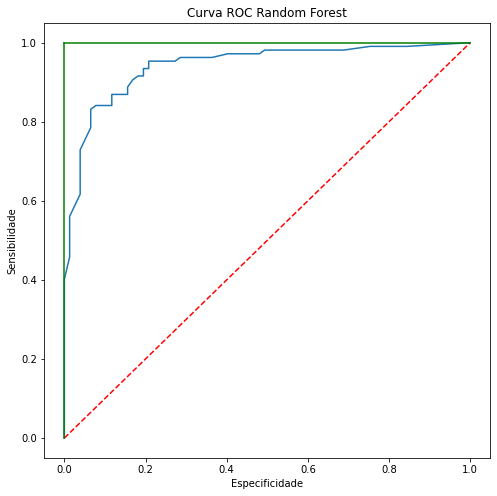


***********CONFUSION MATRIX***********



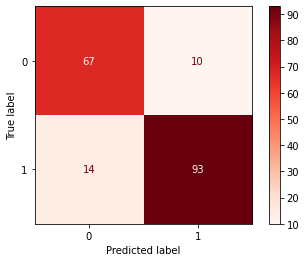

In [265]:
run_random_forest(X_train, y_train, X_test, y_test)

In [270]:
clf = RandomForestClassifier(max_depth=200, max_features=5, criterion='gini', 
                             min_samples_leaf=1, min_samples_split=2).fit(X, y)
prediction = clf.predict(X_test)
tam_i = []
for i in prediction[1:]:
  if i == 1:
    tam_i.append(i)
error_valid_lr = (len(tam_i))
print(f"No conjunto de treino X com {X_train.shape[0]}, temos {error_valid_lr} dados classificados errados")

No conjunto de treino X com 734, temos 107 dados classificados errados


<font color='SeaGreen'> Com este último algoritmo obtivemos resultados um pouco melhores, porém ainda podemos realizar algumas alterações em nosso dataset para chegarmos a valores de acurácia melhores

<font color='SeaGreen'> Para buscarmos um algoritmo de Floresta Aleatória mais eficaz, abaixo iremos rodar um algoritmo de 'tunning' que nos mostrará os melhores parâmetros para nosso dataset, apesar de ser uma boa técnica, ela pode ser custosa computacionalmente, como nosso dataset é pequeno podemos realizar este teste

___________

In [313]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [317]:
random_grid = RandomForestClassifier(random_state=42)
rgcv = GridSearchCV(estimator=random_grid, param_grid=param_grid, cv= 5).fit(X_train, y_train)

In [318]:
rgcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [320]:
random_tuning = RandomForestClassifier(random_state=42, max_features='auto',
                                       n_estimators= 200, max_depth=8,
                                       criterion='gini').fit(X_train, y_train)

In [323]:
y_pred = random_tuning.predict(X_test)
print(f"Acurácia para Random Forest Grid: {accuracy_score(y_test, y_pred)*100}%")

Acurácia para Random Forest Grid: 89.2%


In [324]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       125
           1       0.88      0.90      0.89       125

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [326]:
print('\n***********ROC CURVE***********\n')
prob = random_tuning.predict_proba(X_test)[:,1]
fpr, tpr, limit = roc_curve(y_test, prob) # define a curva ROC
roc_clf = roc_auc_score(y_test, prob)
# calculo da area sobre a curva ROC
print(f'Curva ROC: {(round(roc_clf, 3)*10)}')


***********ROC CURVE***********

Curva ROC: 9.559999999999999


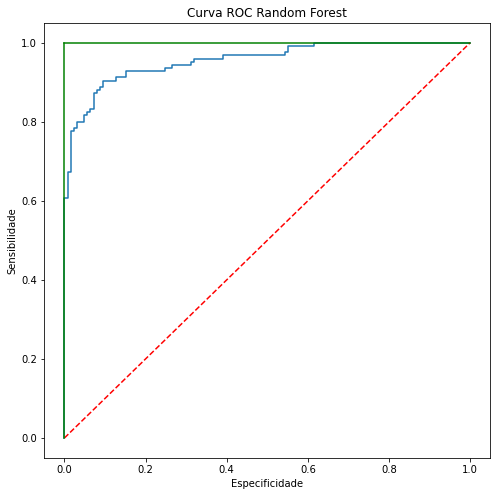

In [327]:
# plotando a curva ROC
plt.subplots(1, figsize=(8,8))
plt.title("Curva ROC Random Forest")
plt.plot(fpr, tpr)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
plt.show()


***********CONFUSION MATRIX***********



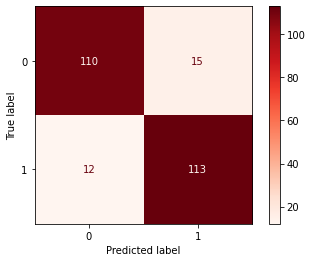

In [328]:
print('\n***********CONFUSION MATRIX***********\n')
conf_matrix = plot_confusion_matrix(random_tuning, X_test, y_test, cmap='Reds')

<font color='SeaGreen'> Podemos ver que com o 'tuning' conseguimos melhorar nosso modelo, na sequencia iremos realizar a validação